<a href="https://colab.research.google.com/github/CorrAUDJPY/Supervised-Learning/blob/main/Supervised_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Supervised Learning***
***Project: Finding Donors for CharityML***. 

In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with 'Implementation' in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a 'Question X' header. Carefully read each question and provide thorough answers in the following text boxes that begin with 'Answer:'. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

Note: Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the Shift + Enter keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

Getting Started
In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations. Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with. While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features.

The dataset for this project originates from the UCI Machine Learning Repository. The datset was donated by Ron Kohavi and Barry Becker, after being published in the article "Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid". You can find the article by Ron Kohavi online. The data we investigate here consists of small changes to the original dataset, such as removing the 'fnlwgt' feature and records with missing or ill-formatted entries.

Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, 'income', will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.


In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
# Pretty display for notebooks
%matplotlib inline

import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#from google.colab import files
#files.upload()

# Import supplementary visualization code visuals.py
import visuals as vs

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the Census dataset
project_folder='/content/drive/My Drive/Colab Notebooks/Udacity_Supervised_Learning/'
data = pd.read_csv(project_folder+'census.csv')

# Success - Display the first record
data.head(2)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K


Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than $50,000. In the code cell below, you will need to compute the following:

- The total number of records, 'n_records'
- The number of individuals making more than 50,000 annually, n_greater_50k
-The number of individuals making at most 50,000   
 annually, 'n_at_most_50k'.
- The percentage of individuals making more than $50,000 annually, 'greater_percent'.
** HINT: ** You may need to look at the table above to understand how the 'income' entries are formatted.


In [ ]:
data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
# TODO: Total number of records
n_records=data.shape[0]
# TODO: Number of records where individual's income is more than $50,000
n_greater_than_50k=data[ data['income']=='>50K' ].shape[0]
# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k=data[ data['income']=='<=50K' ].shape[0]
# TODO: Percentage of individuals whose income is more than $50,000
pct_greater_50k=n_greater_than_50k/n_records
# Print the results
print('Total Records={}, Bigger than 50k={}, Less than 50k={}, % greater than 50k={}'.format(n_records,n_greater_than_50k,n_at_most_50k,pct_greater_50k) )


Total Records=45222, Bigger than 50k=11208, Less than 50k=34014, % greater than 50k=0.2478439697492371


** Featureset Exploration **

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as preprocessing. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.



***Transforming Skewed Continuous Features.***
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number. Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: 'capital-gain' and 'capital-loss'.

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.


In [ ]:
# Split the data into features and target label
income_raw=data['income']
features_raw=data.drop('income',axis=1)

In [ ]:
# Visualize skewed continuous features of original data
def plot_2_barcharts(df,feat_1,feat_2):
  plt.figure( figsize=(10,5))

  plt.subplot(1,2,1)
  plt.hist(df[feat_1])
  plt.xlabel('value')
  plt.ylabel('# of records')
  plt.title(feat_1)

  plt.subplot(1,2,2)
  plt.hist(df[feat_2])
  plt.xlabel('value')
  plt.ylabel('# of records')
  plt.title(feat_2)


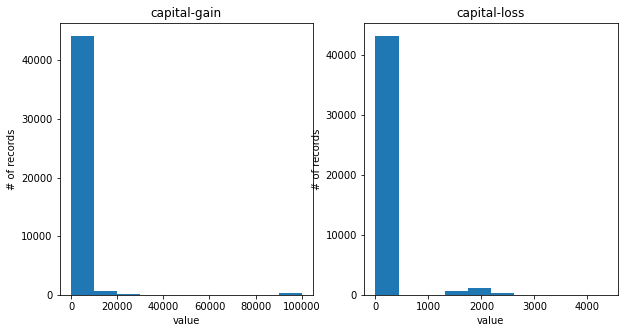

In [ ]:
plot_2_barcharts(features_raw,'capital-gain' , 'capital-loss')


So we have many people with small capital gains, but many people with very large capital gains.  
We need to apply transformations, i.e. log-transform.



For highly-skewed feature distributions such as 'capital-gain' and 'capital-loss', it is common practice to apply a ***logarithmic transformation*** on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed.

In [ ]:
features_raw.head(2)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States


In [ ]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']

features_log= pd.DataFrame(data=features_raw)
for col in skewed:
  features_log[col] = [ np.log(x+1) for x in features_raw[col] ]


In [ ]:
  features_log.head(2)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13.0,United-States


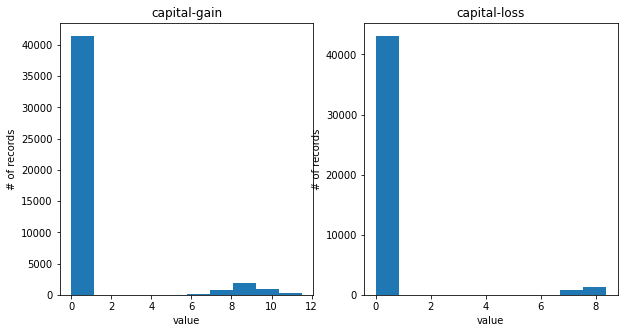

In [ ]:
plot_2_barcharts(features_log,'capital-gain' , 'capital-loss')

***Normalizing Numerical Features***. In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features.   
Applying a scaling to the data does not change the shape of each feature's distribution (such as 'capital-gain' or 'capital-loss' 
above);   
however, ***normalization*** ensures that each feature is 
treated equally when applying supervised learners. Note 
that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use ***sklearn.preprocessing.MinMaxScaler*** for this.

In [ ]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler=MinMaxScaler()
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax = pd.DataFrame(data = features_log)
features_log_minmax[numerical_features] = scaler.fit_transform(features_log[numerical_features])


In [ ]:
features_log_minmax.head(2)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.8,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States


***Implementation: Data Preprocessing***. 

From the table in Exploring-the-Data above, we can see there are several features for each record that are ***non-numeric.***   
Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called ***categorical*** variables) be ***converted***.  
One popular way to convert categorical variables is by using the one-hot encoding scheme.  
***One-hot encoding*** creates a "***dummy***" variable for each possible category of each non-numeric feature.  
For example, assume ***someFeature*** has three possible entries: A, B, or C. We then encode this feature into someFeature_A, someFeature_B and someFeature_C.


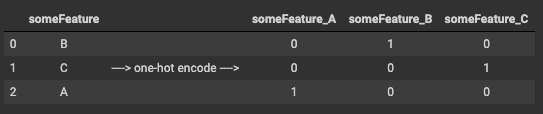

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, 'income' to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as 0 and 1, respectively. In code cell below, you will need to implement the following:

Use ***pandas.get_dummies()*** to perform one-hot encoding on the '***features_log_minmax***' data.
Convert the target label 'income_raw' to numerical entries.
Set records with "<=50K" to 0 and records with ">50K" to 1.

In [ ]:
# TODO: One-hot encode the 'features_log_minmax' data using pandas.get_dummies()
features_final=pd.get_dummies(features_log_minmax)
# TODO: Encode the 'income_raw' data to numerical values
income_final=income_raw.map( {'<=50K':0 , '>50K':1} )

# Print the number of features after one-hot encoding
print('After One-Hot-Encoding I have {} features'.format(features_final.shape[1] ) )
# Uncomment the following line to see the encoded feature names
#print (encoded)

After One-Hot-Encoding I have 103 features


In [ ]:
#features_final.head(2)
income_final.head(3)

0    0
1    0
2    0
Name: income, dtype: int64

***Shuffle and Split Data***.  

Now all ***categorical*** variables have been ***converted*** into numerical features, and all numerical features have been ***normalized***.   
As always, we will now ***split*** the data (both features and their labels) into ***training*** and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( features_final, income_final,
                                                    test_size=0.2, random_state=0)

# Show the results of the split
print('Training set has {} samples'.format(X_train.shape[0] ) )
print('Testing set has {} samples'.format(X_test.shape[0] ) )


Training set has 36177 samples
Testing set has 9045 samples


***Evaluating Model Performance***. 

In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be **supervised** ***learners*** of your choice, and the fourth algorithm is known as a ***naive predictor***.

***Metrics and the Naive Predictor.***  

CharityML, equipped with their research, knows individuals that make more than 50,000 are most likely to donate to their charity. Because of this, CharityML is particularly interested in predicting who makes more than 50,000 accurately.  
It would seem that using accuracy as a metric for evaluating a particular model's performace would be appropriate.  
Additionally, identifying someone that does not make more than 50,000 as someone who does would be detrimental to CharityML, since they are looking to find individuals willing to donate.  
Therefore, a model's ability to precisely predict those that make more than 50,000 is more important than the model's ability to recall those individuals.  
We can use F-beta score as a metric that considers both precision and recall:




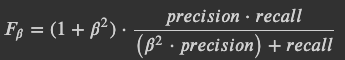

In particular, when  𝛽=0.5 , more emphasis is placed on precision. This is called the F 0.5  score (or F-score for simplicity).

Looking at the distribution of classes (those who make at most  50,000 𝑎𝑛𝑑 𝑡ℎ𝑜𝑠𝑒 𝑤ℎ𝑜 𝑚𝑎𝑘𝑒 𝑚𝑜𝑟𝑒), 𝑖𝑡's clear most individuals do not make more than 50,000.  

This can greatly affect accuracy, since we could simply say "t***his person does not make more than 50,000"*** and generally be right, without ever looking at the data!   
Making such a statement would be called ***naive***, since we have not considered any information to substantiate the claim. It is always important to consider the ***naive prediction*** for your data, to help establish a ***benchmark*** for whether a model is performing well.  
That been said, using that prediction would be pointless: If we predicted all people made less than 50,000, CharityML would identify no one as donors.

Note: Recap of accuracy, precision, recall:  
***Accuracy:*** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

***Precision***: tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

[True Positives/(True Positives + False Positives)]

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

[True Positives/(True Positives + False Negatives)]

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy.  
These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

**Question 1 - Naive Predictor Performace.** 

If we chose a model that always predicted an individual made more than $50,000, what would that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to 'accuracy' and 'fscore' to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: **

When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total.
Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.


In [ ]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''

# TODO: Calculate accuracy, precision and recall
TP=np.sum(income_final)
FP=income_final.count()-TP
TN=0
FN=0

accuracy=(TP+TN)/(TP+FP+FN+TN)
recall=TP / (TP+FN)
precision = TP/(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta=0.5
fscore = (1+beta**2) * (precision*recall)/(beta**2  * precision +recall )

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))


Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


In [ ]:
print('\n ---- NAIVE PREDICTOR ----')
print('\n TP=',TP)
print('\n FP=',FP)
print('\n accuracy=',accuracy)
print('\n recall=',recall)
print('\n precision=',precision)
print('\n F-SCORE=',fscore )



 ---- NAIVE PREDICTOR ----

 TP= 11208

 FP= 34014

 accuracy= 0.2478439697492371

 recall= 1.0

 precision= 0.2478439697492371

 F-SCORE= 0.29172913543228385


***Question 2 - Model Application***  

List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

Describe one real-world application in industry where the model can be applied.
What are the strengths of the model; when does it perform well?
What are the weaknesses of the model; when does it perform poorly?
What makes this model a good candidate for the problem, given what you know about the data?
** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.



1. Logistic Regression
2. Decision Trees
3. Naive Bayes
4. SVMs
5. Ensemble 

**Decision Trees in Sklearn**. 


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
